In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score

# ✅ Funzione per calcolare l'accuracy EM
def evaluate(preds, golds):
    preds = [str(p).strip().lower() for p in preds]
    golds = [str(g).strip().lower() for g in golds]
    return accuracy_score(golds, preds)

# ✅ Funzione per costruire il DataFrame con accuracy per subject
def build_subject_accuracy_df(df, name="model"):
    df["subject"] = df["qid"].apply(lambda x: "_".join(x.split("_")[:-1]))
    stats = []
    for subject in sorted(df["subject"].unique()):
        sub_df = df[df["subject"] == subject]
        acc = evaluate(sub_df["qanswer"], sub_df["gold_answer"])
        stats.append({
            "subject": subject,
            f"accuracy_{name}": acc,
            f"num_questions_{name}": len(sub_df)
        })
    return pd.DataFrame(stats)

# ✅ Carico i risultati dei due reranker
print("🔍 Carico ranking esistente...")

df_answers_ea = pd.read_csv(
    "../data/processed/rag/ea_mmlu_rag_output_cut_3.tsv", sep="\t"#,
    #names=["prompt", "qid", "query", "qanswer", "gold_answer"]
)
df_answers_base = pd.read_csv(
    "../data/processed/rag/base_mmlu_rag_output_cut_3.tsv", sep="\t"#,
#    names=["prompt", "qid", "query", "qanswer", "gold_answer"]
)

df_answers_commondocs = pd.read_csv(
    "../data/processed/rag/commondocs_mmlu_rag_output_cut_3.tsv", sep="\t"#,
#    names=["prompt", "qid", "query", "qanswer", "gold_answer"]
)

index_to_choice = {0: "A", 1: "B", 2: "C", 3: "D"}
df_answers_ea["gold_answer"] = df_answers_ea["gold_answer"].map(index_to_choice)
df_answers_base["gold_answer"] = df_answers_base["gold_answer"].map(index_to_choice)
df_answers_commondocs["gold_answer"] = df_answers_commondocs["gold_answer"].map(index_to_choice)

# ✅ Calcola l’accuracy per subject
df_acc_ea = build_subject_accuracy_df(df_answers_ea, name="ea")
df_acc_base = build_subject_accuracy_df(df_answers_base, name="base")

# ✅ Merge dei due risultati
df_comparison = pd.merge(df_acc_base, df_acc_ea, on="subject")

# ✅ Calcola la differenza di accuratezza
df_comparison["delta_accuracy"] = df_comparison["accuracy_ea"] - df_comparison["accuracy_base"]

# ✅ Ordina per accuratezza nuova (ea)
df_comparison = df_comparison.sort_values(by="accuracy_ea", ascending=False).reset_index(drop=True)

# ✅ Mostra il confronto
print("\n📊 Accuracy comparison by subject:")
df_comparison

# ✅ Salva su file (opzionale)
# df_comparison.to_csv("../results/mmlu_accuracy_comparison_setencoder.csv", index=False)


🔍 Carico ranking esistente...

📊 Accuracy comparison by subject:


,subject,accuracy_base,num_questions_base,accuracy_ea,num_questions_ea,delta_accuracy
0,high_school_government_and_politics,0.958549,193,0.958549,193,0.000000
1,college_biology,0.902778,144,0.916667,144,0.013889
2,high_school_biology,0.916129,310,0.916129,310,0.000000
3,high_school_psychology,0.915596,545,0.911927,545,-0.003670
4,miscellaneous,0.918263,783,0.901660,783,-0.016603
5,high_school_microeconomics,0.857143,238,0.899160,238,0.042017
6,marketing,0.876068,234,0.893162,234,0.017094
7,high_school_us_history,0.906863,204,0.882353,204,-0.024510
8,professional_medicine,0.908088,272,0.882353,272,-0.025735
9,high_school_world_history,0.902954,237,0.881857,237,-0.021097


In [6]:
# ✅ Accuracy globale
global_acc_base = evaluate(df_answers_base["qanswer"], df_answers_base["gold_answer"])
global_acc_ea = evaluate(df_answers_ea["qanswer"], df_answers_ea["gold_answer"])
global_acc_commondocs = evaluate(df_answers_commondocs["qanswer"], df_answers_commondocs["gold_answer"])

print(f"\n📈 Accuracy globale:")
print(f"• SetEncoder BASE: {global_acc_base:.4f}")
print(f"• SetEncoder EA  : {global_acc_ea:.4f}")
print(f"• Delta          : {global_acc_ea - global_acc_base:+.4f}")
print(f"• SetEncoder BASE^EA  : {global_acc_commondocs:.4f}")



📈 Accuracy globale:
• SetEncoder BASE: 0.7642
• SetEncoder EA  : 0.7621
• Delta          : -0.0021
• SetEncoder BASE^EA  : 0.7716


In [21]:
def format_latex_table(df, caption="Confronto per subject", label="tab:subject_comparison", top_n=None):
    lines = []

    # Intestazione
    lines.append("\\begin{table}[ht]")
    lines.append("\\centering")
    lines.append("\\scriptsize")
    lines.append("\\begin{tabular}{lccc}")
    lines.append("\\toprule")
    lines.append("\\textbf{Subject} & \\textbf{Base} & \\textbf{EA} & \\textbf{$\\Delta$} \\\\")
    lines.append("\\midrule")

    # Righe
    subset = df if top_n is None else df.head(top_n)
    for _, row in subset.iterrows():
        subject = row["subject"].replace("_", "\\_")[:40]  # escaping LaTeX
        base = f"{row['accuracy_base']:.3f}"
        ea = f"{row['accuracy_ea']:.3f}"
        delta = f"{row['delta_accuracy']:+.3f}"
        lines.append(f"{subject} & {base} & {ea} & {delta} \\\\")

    lines.append("\\bottomrule")
    lines.append("\\end{tabular}")
    lines.append(f"\\caption{{{caption}}}")
    lines.append(f"\\label{{{label}}}")
    lines.append("\\end{table}")

    return "\n".join(lines)


In [22]:
latex_table = format_latex_table(df_comparison, caption="Accuratezza per subject tra i due reranker")
print(latex_table)


\begin{table}[ht]
\centering
\scriptsize
\begin{tabular}{lccc}
\toprule
\textbf{Subject} & \textbf{Base} & \textbf{EA} & \textbf{$\Delta$} \\
\midrule
high\_school\_government\_and\_politics & 0.959 & 0.959 & +0.000 \\
college\_biology & 0.903 & 0.917 & +0.014 \\
high\_school\_biology & 0.916 & 0.916 & +0.000 \\
high\_school\_psychology & 0.916 & 0.912 & -0.004 \\
miscellaneous & 0.918 & 0.902 & -0.017 \\
high\_school\_microeconomics & 0.857 & 0.899 & +0.042 \\
marketing & 0.876 & 0.893 & +0.017 \\
high\_school\_us\_history & 0.907 & 0.882 & -0.025 \\
professional\_medicine & 0.908 & 0.882 & -0.026 \\
high\_school\_world\_history & 0.903 & 0.882 & -0.021 \\
high\_school\_geography & 0.904 & 0.874 & -0.030 \\
sociology & 0.851 & 0.871 & +0.020 \\
prehistory & 0.858 & 0.861 & +0.003 \\
medical\_genetics & 0.870 & 0.860 & -0.010 \\
high\_school\_european\_history & 0.848 & 0.855 & +0.006 \\
us\_foreign\_policy & 0.850 & 0.850 & +0.000 \\
jurisprudence & 0.843 & 0.843 & +0.000 \\
managemen

In [18]:
import pandas as pd

def load_run(path):
    return pd.read_csv(
        path,
        sep="\t",
        names=["qid", "Q0", "doc_id", "rank", "score", "run_name", "text"]
    )

def compute_doc_diff(df_base, df_ea, top_n=5):
    # Filtra top-N
    base_top = df_base[df_base["rank"] <= top_n]
    ea_top   = df_ea[df_ea["rank"] <= top_n]

    # Costruisci dizionario: qid → set di doc_id
    base_dict = base_top.groupby("qid")["doc_id"].apply(set).to_dict()
    ea_dict   = ea_top.groupby("qid")["doc_id"].apply(set).to_dict()

    # Confronta
    results = []
    for qid in sorted(set(base_dict) & set(ea_dict)):
        base_docs = base_dict[qid]
        ea_docs = ea_dict[qid]
        intersection = base_docs & ea_docs
        symmetric_diff = base_docs ^ ea_docs
        results.append({
            "qid": qid,
            "common_docs": len(intersection),
            "symmetric_diff": len(symmetric_diff)
        })

    return pd.DataFrame(results)


# Carica le run
df_run_base = load_run("../data/processed/rag/__setencoder-novelty-base__msmarco-segment-mmlu.tsv")
df_run_ea   = load_run("../data/processed/rag/__setencoder-novelty-ea__msmarco-segment-mmlu.tsv")

# Parametro top-N
#N = 10

# Calcola la differenza tra le due run
#diff_df = compute_doc_diff(df_run_base, df_run_ea, top_n=N)

# Mostra alcune statistiche
#diff_df.describe()

# Esamina qualche esempio
#diff_df.sort_values(by="symmetric_diff", ascending=False).head())


,common_docs,symmetric_diff
count,14042.000000,14042.000000
mean,6.836562,6.325737
std,1.498567,2.996497
min,0.000000,0.000000
25%,6.000000,4.000000
50%,7.000000,6.000000
75%,8.000000,8.000000
max,10.000000,20.000000


In [23]:
df_run_base = load_run("../data/processed/rag/__setencoder-novelty-base__msmarco-segment-mmlu.tsv")
df_run_ea   = load_run("../data/processed/rag/__setencoder-novelty-ea__msmarco-segment-mmlu.tsv")

def compute_avg_common_docs(df_base, df_ea, cutoff_list):
    results = []
    for k in cutoff_list:
        base_top = df_base[df_base["rank"] <= k]
        ea_top = df_ea[df_ea["rank"] <= k]

        base_dict = base_top.groupby("qid")["doc_id"].apply(set).to_dict()
        ea_dict = ea_top.groupby("qid")["doc_id"].apply(set).to_dict()

        commons = []
        for qid in set(base_dict) & set(ea_dict):
            intersection = base_dict[qid] & ea_dict[qid]
            commons.append(len(intersection))

        avg_common = sum(commons) / len(commons)
        results.append({
            "cutoff": k,
            "avg_common_docs": avg_common
        })

    return pd.DataFrame(results)

def format_latex_common_table(df, caption="Documenti in comune nei top-k tra i due reranker", label="tab:avg_common_docs"):
    lines = [
        "\\begin{table}[ht]",
        "\\centering",
        "\\begin{tabular}{lc}",
        "\\toprule",
        "\\textbf{Cutoff} & \\textbf{Avg. Common Documents} \\\\",
        "\\midrule"
    ]
    for _, row in df.iterrows():
        lines.append(f"{int(row['cutoff'])} & {row['avg_common_docs']:.2f} \\\\")
    lines += [
        "\\bottomrule",
        "\\end{tabular}",
        f"\\caption{{{caption}}}",
        f"\\label{{{label}}}",
        "\\end{table}"
    ]
    return "\n".join(lines)

cutoffs = [3, 5, 10]
avg_common_df = compute_avg_common_docs(df_run_base, df_run_ea, cutoffs)
print(avg_common_df)

   cutoff  avg_common_docs
0       3         1.693420
1       5         3.078906
2      10         6.836562


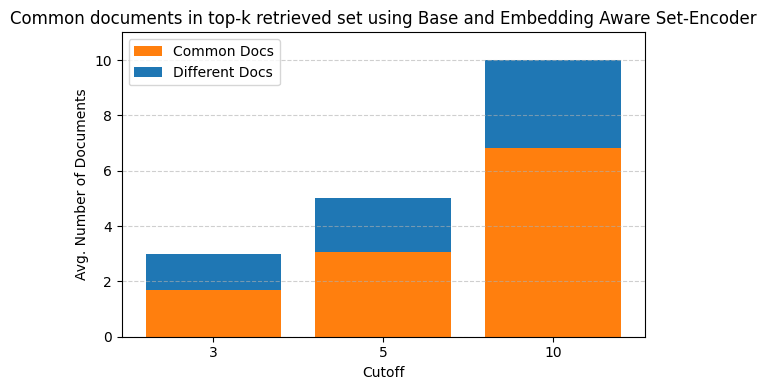

In [32]:
import matplotlib.pyplot as plt

def plot_avg_common_docs_bar(df):
    # Calcola la differenza tra cutoff e common
    df["diff_docs"] = df["cutoff"] - df["avg_common_docs"]

    plt.figure(figsize=(6, 4))
    
    # Prima la parte bassa (common, in arancio)
    plt.bar(df["cutoff"].astype(str), df["avg_common_docs"], label="Common Docs", color="#ff7f0e")

    # Poi la parte alta (diff, in blu) impilata sopra
    plt.bar(df["cutoff"].astype(str), df["diff_docs"], bottom=df["avg_common_docs"], label="Different Docs", color="#1f77b4")

    plt.ylim(0, df["cutoff"].max() + 1)
    plt.xlabel("Cutoff")
    plt.ylabel("Avg. Number of Documents")
    plt.title("Common documents in top-k retrieved set using Base and Embedding Aware Set-Encoder")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_avg_common_docs_bar(avg_common_df)


In [25]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
